In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("tiktok.db")

cmd = \
    f"""
    SELECT id, video_title, sound_transcribed, upload_time, view
    FROM tiktok
    """ 
    
tiktoks = pd.read_sql_query(cmd, conn)
    
conn.close()

In [4]:
tiktoks.head()

,id,video_title,sound_transcribed,upload_time,view
0,7037034323417107759,EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...,NA,https://v16-webapp.tiktok.com/c236514e9e9afb02...,63900000
1,7059020753978789166,🐈Are you envious? #fy #kitty #cat #love #kiss,NA,https://v16-webapp.tiktok.com/19acdfd3ecbceb5f...,5400000
2,7061272988615707950,Fyp,Bonanza,https://v16-webapp.tiktok.com/e4d4117e4cd54b88...,3800000
3,7039714932283362607,100% the truth! ❤️,beautiful,https://v16-webapp.tiktok.com/66467801dcb7df68...,37900000
4,7056048829749218607,,NA,https://v16-webapp.tiktok.com/fd0801d14a758eef...,8300000


In [5]:
audio_tiktoks = tiktoks[tiktoks["sound_transcribed"] != "NA"]
audio_tiktoks = audio_tiktoks.drop_duplicates(subset='id')
audio_tiktoks.size

605

In [6]:
audio_tiktoks["video_title"]

2                                                     Fyp
3                                      100% the truth! ❤️
7                                                        
8       she really tried to kick us off the plane.😂😂 @...
10             Roni does another TikTok #dance! #flipbook
                              ...                        
991     For your #Superbowl #halftimeshow  By popular ...
993                 Your 1st @ has a crush on you 😳 #fypシ
1045               Thank you so much for being my friend!
1068                        How many likes you see now? 🤍
1071                              #michaeljackson #tiktok
Name: video_title, Length: 121, dtype: object

In [7]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for title in audio_tiktoks["video_title"][:10]:
    sid = SentimentIntensityAnalyzer()
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Fyp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
100% the truth! ❤️
compound: 0.3802, neg: 0.0, neu: 0.536, pos: 0.464, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
she really tried to kick us off the plane.😂😂 @theskimaskgirl
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Roni does another TikTok #dance! #flipbook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
#cute #dog
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
MANY PPL ASKED. <3 GTG TO SCHOOL #fyp #foryou #tysm #A+K
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
How Tiktok behind the scenes are… 😂 @coreyscherer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He just want to hangout w me and all I do is bully him 😔 #foryou #fyp #baby #brother
compound: -0.4404, neg: 0.173, neu: 0.757, pos: 0.07, 
#trending #fyp #manga #anime #killua #animetiktok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


In [9]:
ss = [SentimentIntensityAnalyzer().polarity_scores(title) for title in audio_tiktoks["video_title"]]
ss[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [10]:
import collections

add_dict = collections.Counter({'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'neg': 0.0})

for s in ss:
    counter = collections.Counter(s)
    add_dict += counter
    dict_ss = dict(add_dict)

# take the average score
for k in dict_ss.keys():
    dict_ss[k] = dict_ss[k]/len(dict_ss)

dict_ss

{'neu': 23.872500000000002,
 'pos': 2.129,
 'compound': 2.16075,
 'neg': 0.7484999999999999}

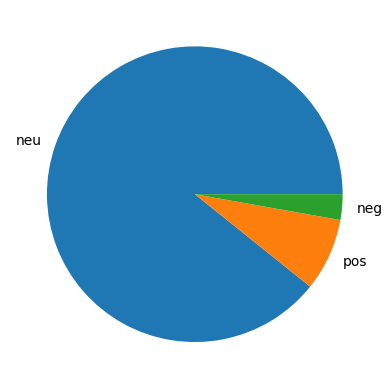

In [13]:
import matplotlib.pyplot as plt

dict_data = dict_ss.copy()
dict_data.pop('compound')
plt.pie(dict_data.values(), labels=dict_data.keys())
plt.show()

In [14]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

titles = tiktoks["video_title"]
hashtags = hashtag_extract(titles)
hashtags[:10]

[['fyp', 'bts', 'btsarmy', 'btsconcert2021', 'taehyung', 'ptdonstage', 'btsv'],
 ['fy', 'kitty', 'cat', 'love', 'kiss'],
 [],
 [],
 [],
 [],
 ['catsoftikok'],
 [],
 [],
 []]

In [15]:
hashtags = sum(hashtags, [])
hashtags[:10]

['fyp',
 'bts',
 'btsarmy',
 'btsconcert2021',
 'taehyung',
 'ptdonstage',
 'btsv',
 'fy',
 'kitty',
 'cat']

In [16]:
import pandas as pd
series = pd.Series(hashtags)
freq = series.value_counts()
df = pd.DataFrame(freq[:10]).reset_index()
df = df.rename(columns={"index": "hashtag", 0: "frequency"})

In [17]:
ss_h = [SentimentIntensityAnalyzer().polarity_scores(h) for h in df["hashtag"]]
compound_h = [ss_h[i]['compound'] for i in range(len(ss_h))]
df['score'] = compound_h
df

,hashtag,frequency,score
0,fyp,220,0.0000
1,foryou,148,0.0000
2,cat,95,0.0000
3,funny,75,0.4404
4,viral,75,0.0000
5,cute,58,0.4588
6,dog,57,0.0000
7,pet,51,0.0000
8,foryoupage,49,0.0000
9,fypシ,38,0.0000
